Notebook basado en el artículo [Iris Classification using a Keras Neural Network](https://medium.com/@manwill/iris-classification-using-a-keras-neural-network-39d735d11fda)


# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load dataset

In [2]:
df = load_iris()

In [3]:
df['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Split data in train and test

In [7]:
y = OneHotEncoder().fit_transform(df['target'].reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.2, random_state=42)

print("Train X dataset shape: ", np.shape(X_train))
print("Train y dataset shape: ", np.shape(y_train))
print("Test X dataset shape: ", np.shape(X_test))
print("Test y dataset shape: ", np.shape(y_test))

Train X dataset shape:  (120, 4)
Train y dataset shape:  (120, 3)
Test X dataset shape:  (30, 4)
Test y dataset shape:  (30, 3)


# Model definition

In [8]:
def create_classifier():
  model = Sequential()

  model.add(Dense(16, activation='relu', input_dim=len(X_train[0])))
  model.add(Dense(len(y_train[0]), activation='softmax'))

  return model

In [10]:
model = create_classifier()
model.summary()
#plot_model(model, show_shapes=True, show_layer_names=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

# Train model

In [13]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/20
8/8 [==============================] - 5s 30ms/step - loss: 1.5117 - accuracy: 0.3417 - val_loss: 1.4465 - val_accuracy: 0.3000
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 1.3355 - accuracy: 0.3417 - val_loss: 1.2831 - val_accuracy: 0.3000
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 1.2157 - accuracy: 0.3583 - val_loss: 1.1716 - val_accuracy: 0.4333
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 1.1408 - accuracy: 0.5083 - val_loss: 1.1019 - val_accuracy: 0.4000
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 1.0945 - accuracy: 0.3417 - val_loss: 1.0534 - val_accuracy: 0.4000
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 1.0527 - accuracy: 0.3333 - val_loss: 1.0146 - val_accuracy: 0.3667
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: 1.0177 - accuracy: 0.3333 - val_loss: 0.9794 - val_accuracy: 0.4000
Epoch 8/20
8/8 [=================

# Evaluate the model

In [14]:
def plot_losses(history):
    plt.rcParams['figure.figsize'] = [20, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

    ax1.set_title('Losses')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax1.grid()
    ax1.plot(history['loss'], label='Training loss')
    ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend()

    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="upper right")
    ax2.grid()
    ax2.plot(history['accuracy'], label='Training accuracy')
    ax2.plot(history['val_accuracy'], label='Validation accuracy')
    ax2.legend()

    plt.show()

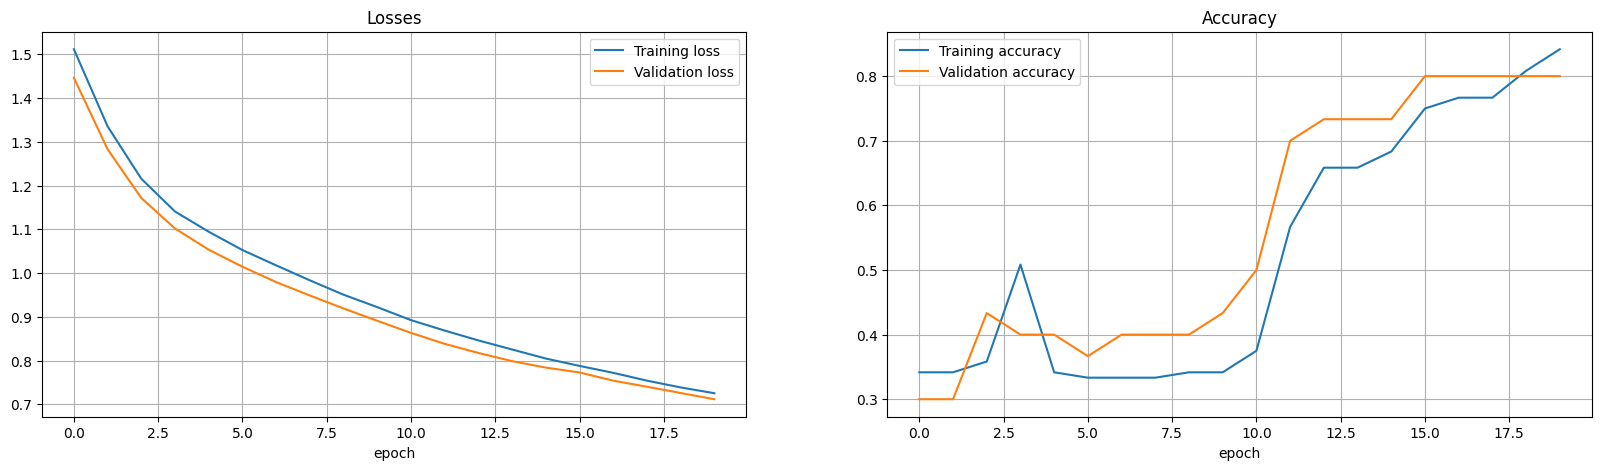

In [15]:
plot_losses(history.history)

---

Creado por **Guillermo Iglesias** (guillermo.iglesias@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">